In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Let's Check unique value in each column.
for i in data.columns:
    print('Unique Values in ' + i + ' column: ' + str(len(data[i].unique())))

Unique Values in PassengerId column: 891
Unique Values in Survived column: 2
Unique Values in Pclass column: 3
Unique Values in Name column: 891
Unique Values in Sex column: 2
Unique Values in Age column: 89
Unique Values in SibSp column: 7
Unique Values in Parch column: 7
Unique Values in Ticket column: 681
Unique Values in Fare column: 248
Unique Values in Cabin column: 148
Unique Values in Embarked column: 4


In [5]:
# Passenger ID is a serial no., so we can safely drop this column.
data.drop('PassengerId',axis = 1, inplace= True)

In [6]:
data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Every name contain some Mr, Mrs, Miss or Master as prefix, so we can use the name column to categorize everyone in one
of these group. After classification, we found out some names do not include any of these prefix, but we notice that instead of these prefix they contain some professional terms like Dr., Captain. So we decide tho froup them in Mr or Mrs based on their sex.

In [7]:
data['Category'] = data['Name']
for i in range(len(data.Name)):
    if 'Mr' in data.Name[i]:
        data['Category'][i] = 'Mr'
    elif 'Mrs' in data.Name[i]:
        data['Category'][i] = 'Mrs'
    elif 'Miss' in data.Name[i]:
        data['Category'][i] = 'Miss'
    elif 'Master' in data.Name[i]:
        data['Category'][i] = 'Master';
    elif data['Sex'][i] == 'male':
        data['Category'][i] = 'Mr'
    elif data['Sex'][i] == 'female':
        data['Category'][i] = 'Mrs'

<ipython-input-7-45e0076c1057>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'][i] = 'Mr'
<ipython-input-7-45e0076c1057>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'][i] = 'Miss'
<ipython-input-7-45e0076c1057>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Category'][i] = 'Master';
<ipython-input-7-45e0076c1057>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [8]:
data['Category'].unique()

array(['Mr', 'Miss', 'Master', 'Mrs'], dtype=object)

In [9]:
# Name will not provide any help to our madel, so we drop the Name column.
data.drop('Name', axis = 1, inplace = True)

In [10]:
len(data.Ticket.unique())

681

In [11]:
# Ticket will not provide us any information, So it would be better to drop it.
data.drop('Ticket', axis =1, inplace= True)

In [12]:
# Sex is a Categorical variable, so it would be better to convert in numbers.
data['Sex'] = data['Sex'].map({'male': 0, 'female' :1})

In [13]:
print('Unique Values in Cabin Column: ' + str(len(data.Cabin.unique())))
print('Null Values in Cabin Column: ' + str(data.Cabin.isnull().sum()))
print('Percentage of null Values in Cabin Column: ' + str((data.Cabin.isnull().sum() * 100)/len(data.Cabin))[:5] + '%')

Unique Values in Cabin Column: 148
Null Values in Cabin Column: 687
Percentage of null Values in Cabin Column: 77.10%


In [14]:
# Cabin columns have huge number of missing values, also it does not give us any vital information. So, we should drop this column.
data.drop('Cabin',axis =1 , inplace= True)

In [15]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mr
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mr
4,0,3,0,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Mr
887,1,1,1,19.0,0,0,30.0000,S,Miss
888,0,3,1,NaN,1,2,23.4500,S,Miss
889,1,1,0,26.0,0,0,30.0000,C,Mr


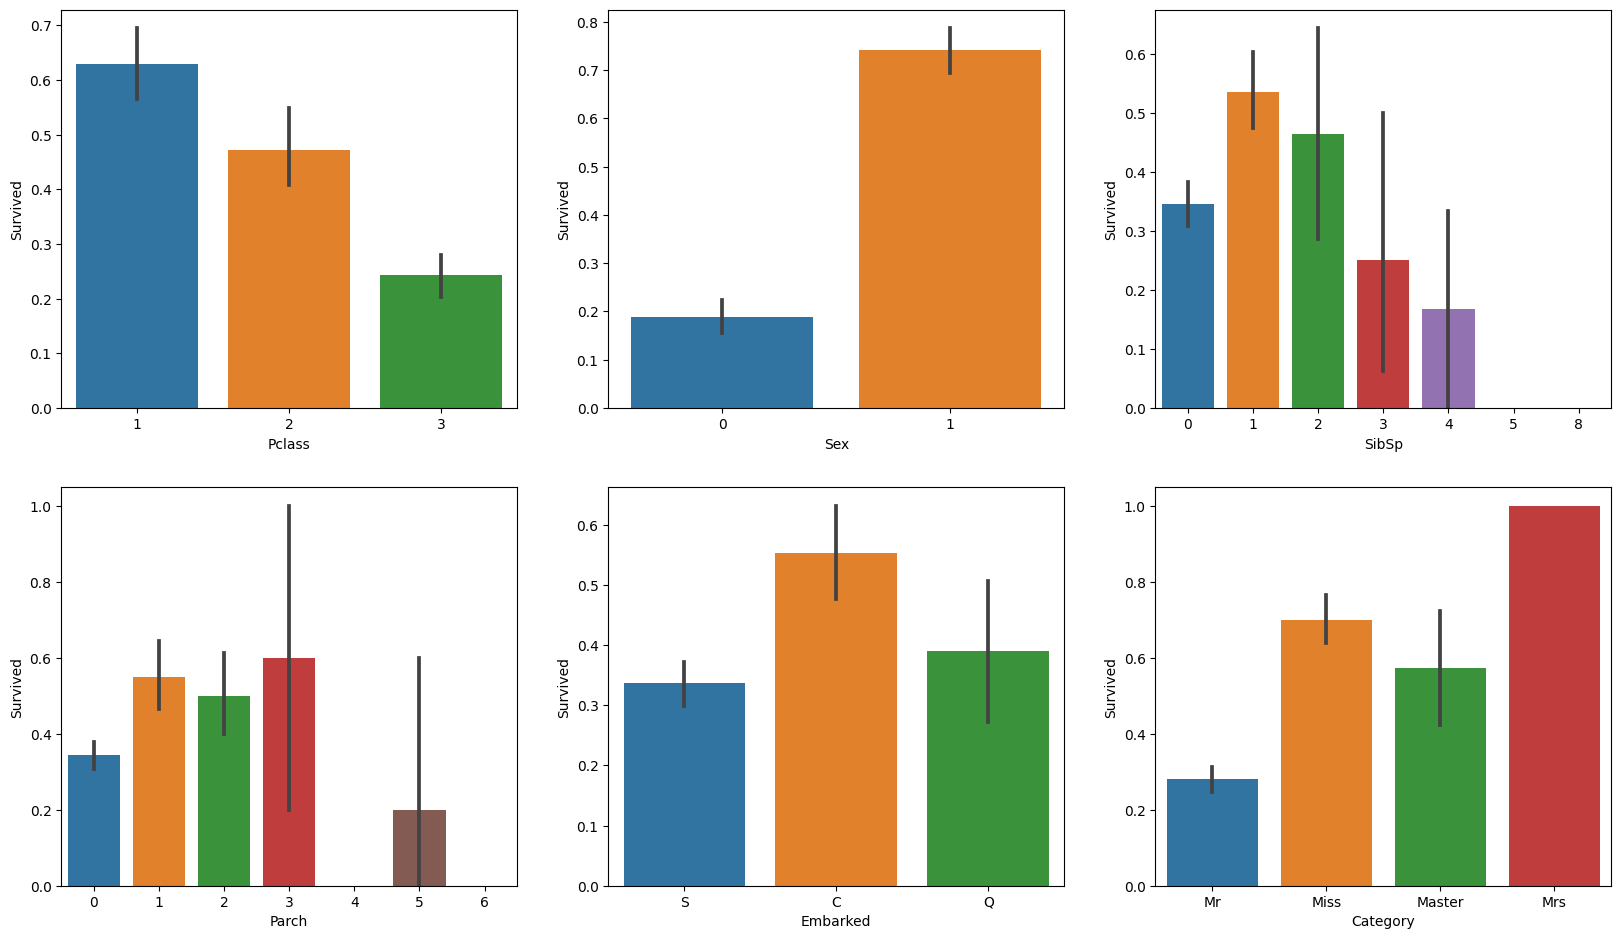

In [16]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data.columns.drop(['Survived','Age','Fare']):
    plt.subplot(5,3,plotnumber)
    sns.barplot(x = str(i) , y = 'Survived', data = data)
    plotnumber += 1

The above graph show us the ratio of survival of each class in each column.

In [17]:
data.corr()

<ipython-input-17-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


<ipython-input-18-2a0da49f28c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot= True);


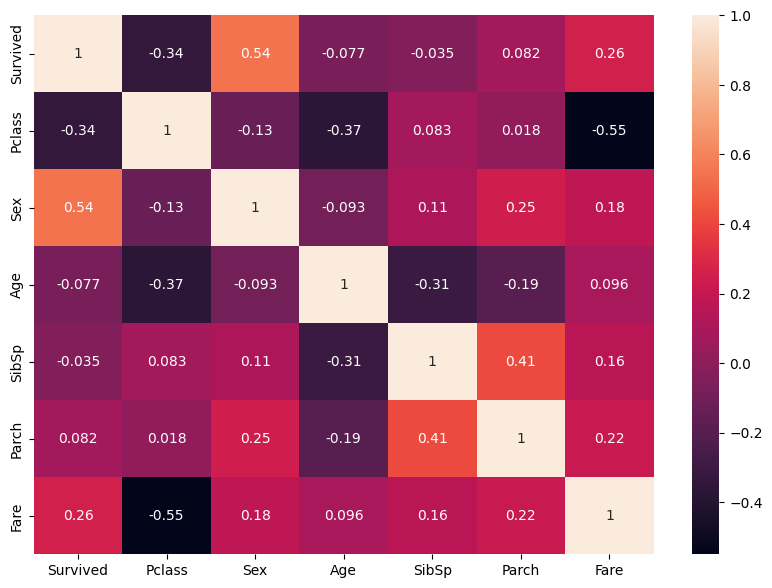

In [18]:
# The heatmap gives us the visual representation of correlation between variables.
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot= True);

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [20]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Category      0
dtype: int64

<ipython-input-21-12682288215e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[str(i)])
<ipython-input-21-12682288215e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[str(i)])
<ipython-input-21-12682288215e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed 

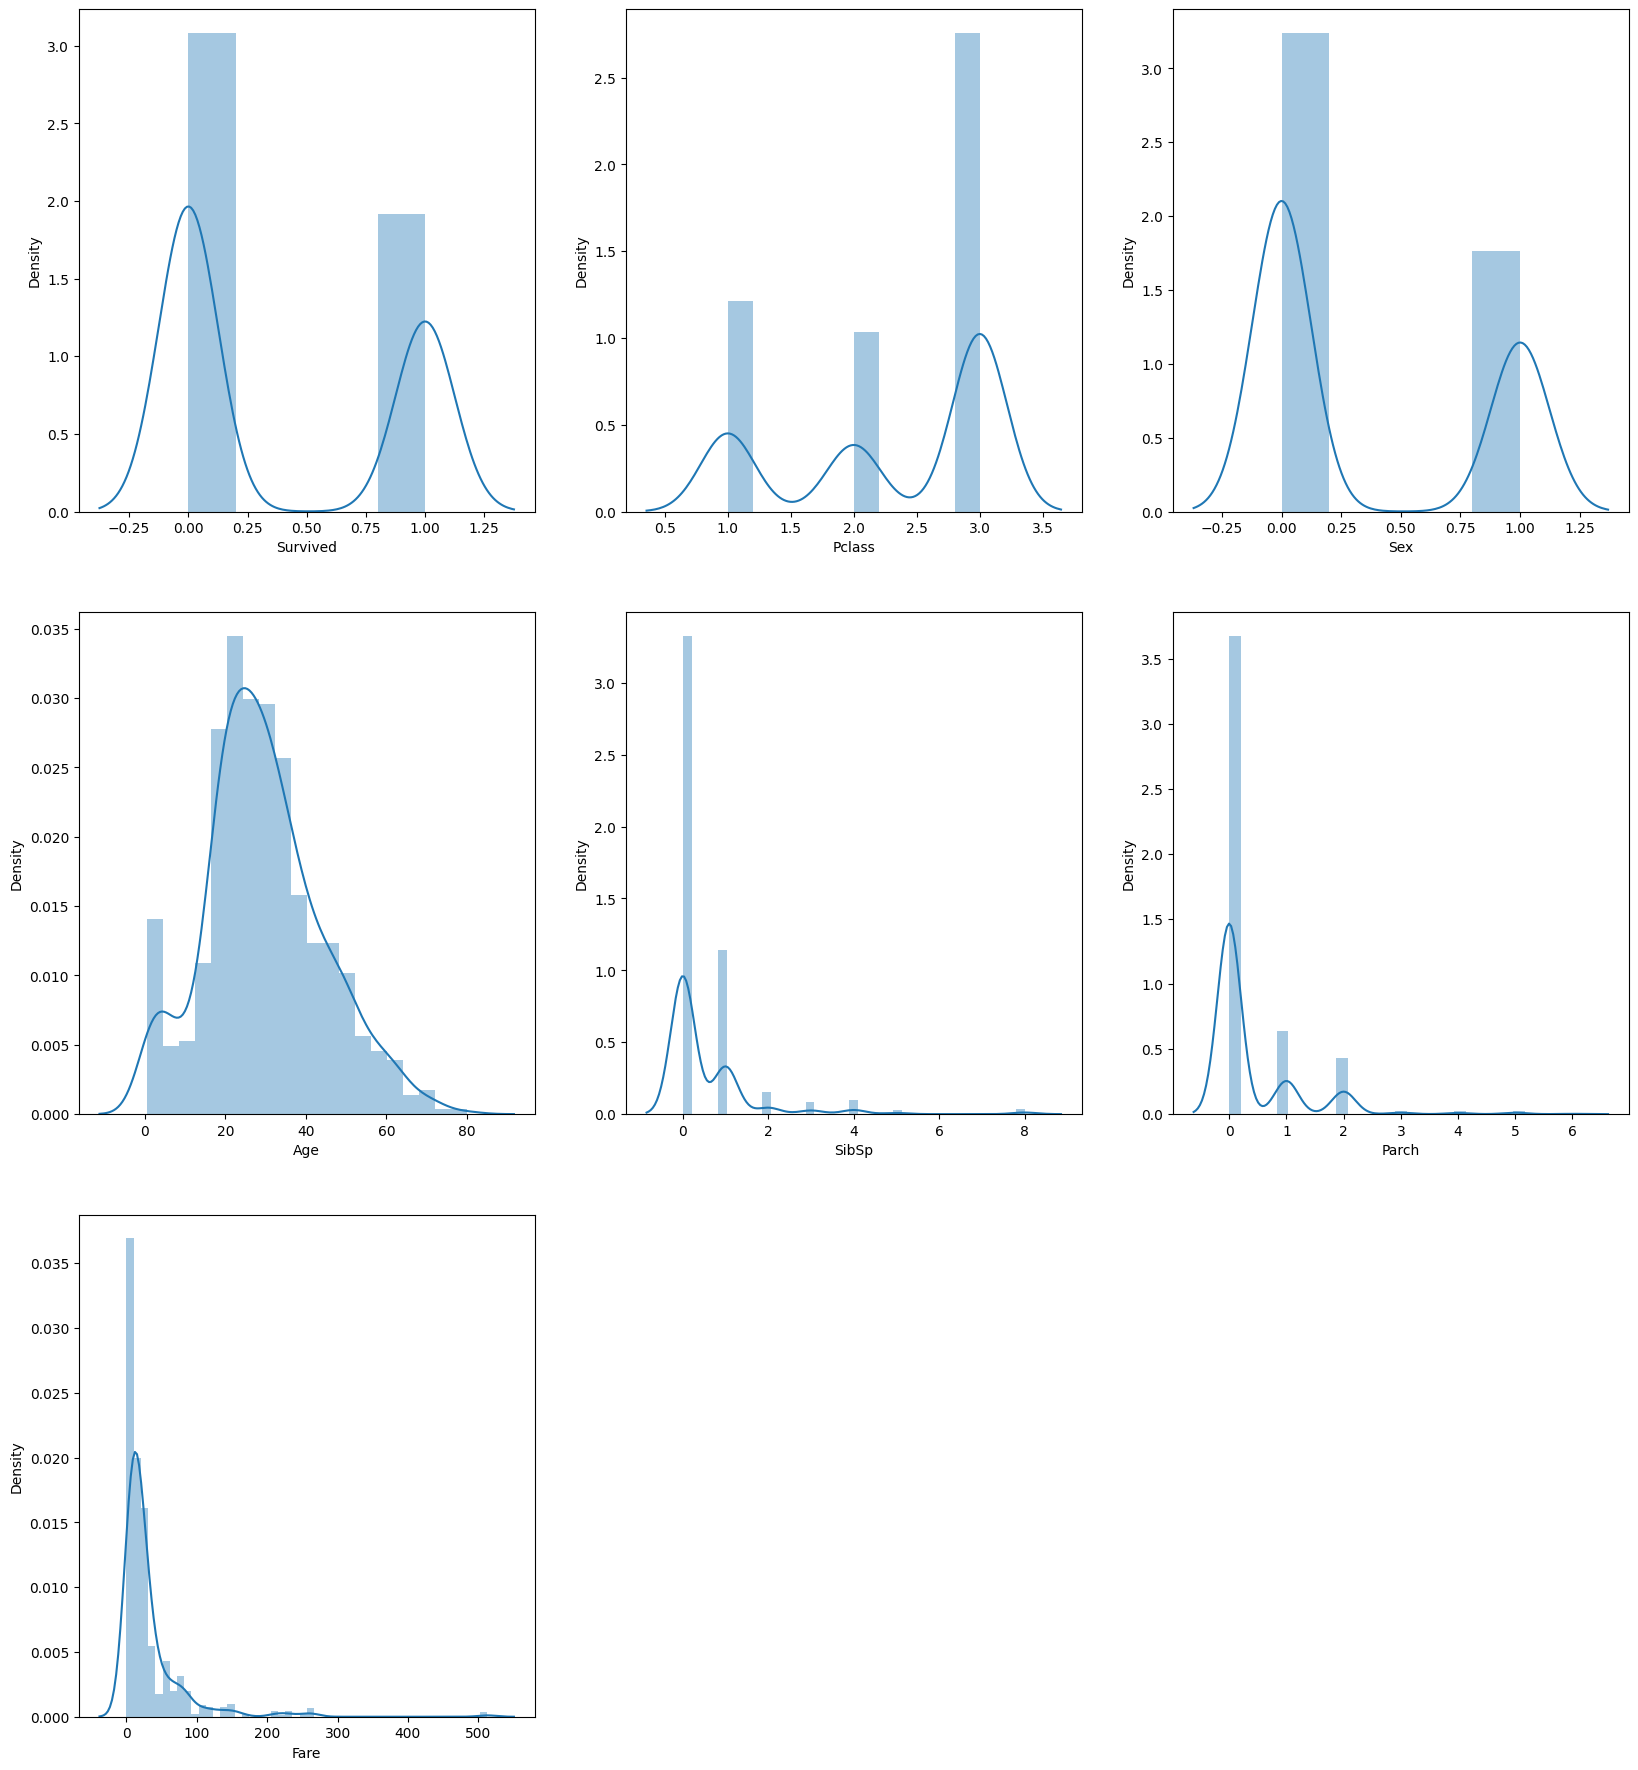

In [21]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in data.drop(['Embarked','Category'], axis =1):
    plt.subplot(4,3,plotnumber)
    sns.distplot(data[str(i)])
    plotnumber += 1

<Axes: >

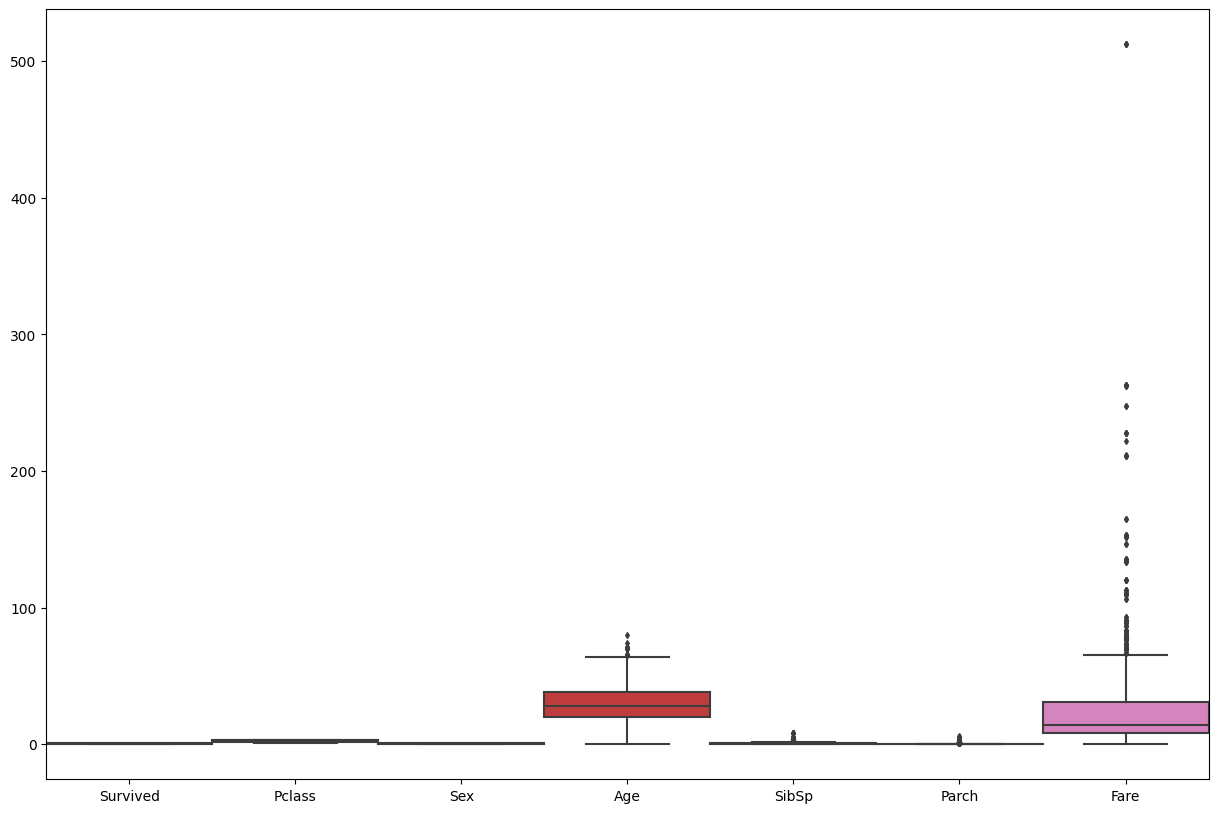

In [22]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = data, width = 1,ax = ax, fliersize= 3)

In [23]:
# There are large no. of outliers in the Fare column and Age Column.
# 1. Age Column (3 sigma rule as age column is somewhat like Gaussian Distribbution)
z = data.Age.mean() + 3 * data.Age.std()
data[data.Age > z]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
630,1,1,0,80.0,0,0,30.000,S,Mr
851,0,3,0,74.0,0,0,7.775,S,Mr


There are not much oiutliers in The age column, we can leave them unhandled

In [24]:
# 2. Fare Column (There are some Extreme outliers, we try to remove them only)
IQR = data.Fare.quantile(.75) - data.Fare.quantile(0.25)
ext = data.Fare.median() + 3 * IQR
data.Fare.replace(list(data[data.Fare > ext].Fare),ext, inplace= True)

Now, we shall deal with missing rows.

In [25]:
data.iloc[np.where(data['Embarked'].isnull() == True)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Category
61,1,1,1,38.0,0,0,80.0,NaN,Miss
829,1,1,1,62.0,0,0,80.0,NaN,Mr


In The above rows, the Fair paid is quite high, It may be due to their Pclass or either they have boarded from distant platform.

In [26]:
data.groupby('Embarked').Fare.median()

Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64

In [27]:
data.groupby('Embarked').Fare.median()

Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64

In [28]:
data.groupby('Embarked').Pclass.median()

Embarked
C    1.0
Q    3.0
S    3.0
Name: Pclass, dtype: float64

Since Embarked denotes the platform, from where the passenger has boarded. Therfore, it's value highly depend on Fare and Pclass. From above findings, it is clear that passenger was from C embarked.

In [29]:
data.Embarked.fillna('C', inplace= True)

In Category and Embarked column, there are values which can't be ranked, so we use one hot encoder to make seperate columns for them.

In [30]:
z1 = pd.get_dummies(data.Category, prefix = 'Category')
z1.drop('Category_Mr', axis =1, inplace = True)
z2 = pd.get_dummies(data.Embarked, prefix = 'Embarked', drop_first= True)

In [31]:
data = data.join(z1)
data = data.join(z2)

In [32]:
data.drop('Embarked', axis = 1, inplace = True)

In [33]:
# Converting Category column values in ordinal values
data.Category = data['Category'].map({'Mr':1,'Master':2,'Miss':3, 'Mrs':4})

In [34]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Category,Category_Master,Category_Miss,Category_Mrs,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,3,0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,0,0,1
887,1,1,1,19.0,0,0,30.0000,3,0,1,0,0,1
888,0,3,1,NaN,1,2,23.4500,3,0,1,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0,0,0,0


In [35]:
data.corrwith(data.Age)

Survived          -0.077221
Pclass            -0.369226
Sex               -0.093254
Age                1.000000
SibSp             -0.308247
Parch             -0.189119
Fare               0.150739
Category          -0.365471
Category_Master   -0.398827
Category_Miss     -0.274275
Category_Mrs       0.010997
Embarked_Q        -0.022405
Embarked_S        -0.032523
dtype: float64

Age have the highest correlation with Passenger class and Category class. We create a new column which mark teenager ( i.e Miss and Master) as 1 and adults (Mr. and Mrs.) as 2.

In [36]:
data['new_cate'] = data['Category'].map({1:5,2:6,3:7,4:8})
data['new_cate'] = data['new_cate'].map({5:2,7:1,6:1,8:2})

In [37]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Category,Category_Master,Category_Miss,Category_Mrs,Embarked_Q,Embarked_S,new_cate
0,0,3,0,22.0,1,0,7.2500,1,0,0,0,0,1,2
1,1,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,2
2,1,3,1,26.0,0,0,7.9250,3,0,1,0,0,1,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,2
4,0,3,0,35.0,0,0,8.0500,1,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,0,0,1,2
887,1,1,1,19.0,0,0,30.0000,3,0,1,0,0,1,1
888,0,3,1,NaN,1,2,23.4500,3,0,1,0,0,1,1
889,1,1,0,26.0,0,0,30.0000,1,0,0,0,0,0,2


In [38]:
data.corrwith(data.Age)

Survived          -0.077221
Pclass            -0.369226
Sex               -0.093254
Age                1.000000
SibSp             -0.308247
Parch             -0.189119
Fare               0.150739
Category          -0.365471
Category_Master   -0.398827
Category_Miss     -0.274275
Category_Mrs       0.010997
Embarked_Q        -0.022405
Embarked_S        -0.032523
new_cate           0.454429
dtype: float64

In [39]:
# Since Age group contains some outliers, Its better to use median than mean
data.groupby('new_cate').Age.median()

new_cate
1    18.0
2    31.0
Name: Age, dtype: float64

In [40]:
data.isnull().sum()

Survived             0
Pclass               0
Sex                  0
Age                177
SibSp                0
Parch                0
Fare                 0
Category             0
Category_Master      0
Category_Miss        0
Category_Mrs         0
Embarked_Q           0
Embarked_S           0
new_cate             0
dtype: int64

In [41]:
m1 = data.loc[data.new_cate == 1]
m2 = data.loc[data.new_cate == 2]

In [42]:
m1.Age.fillna(m1.Age.median(), inplace = True)
m2.Age.fillna(m2.Age.median(), inplace = True)

<ipython-input-42-07c5ef0f1505>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1.Age.fillna(m1.Age.median(), inplace = True)
<ipython-input-42-07c5ef0f1505>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2.Age.fillna(m2.Age.median(), inplace = True)


In [43]:
data = pd.concat([m1,m2])
data = data.sort_index()

In [44]:
data.drop(['new_cate','Category'], axis =1 , inplace= True)

In [45]:
data.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Category_Master    0
Category_Miss      0
Category_Mrs       0
Embarked_Q         0
Embarked_S         0
dtype: int64

<Axes: >

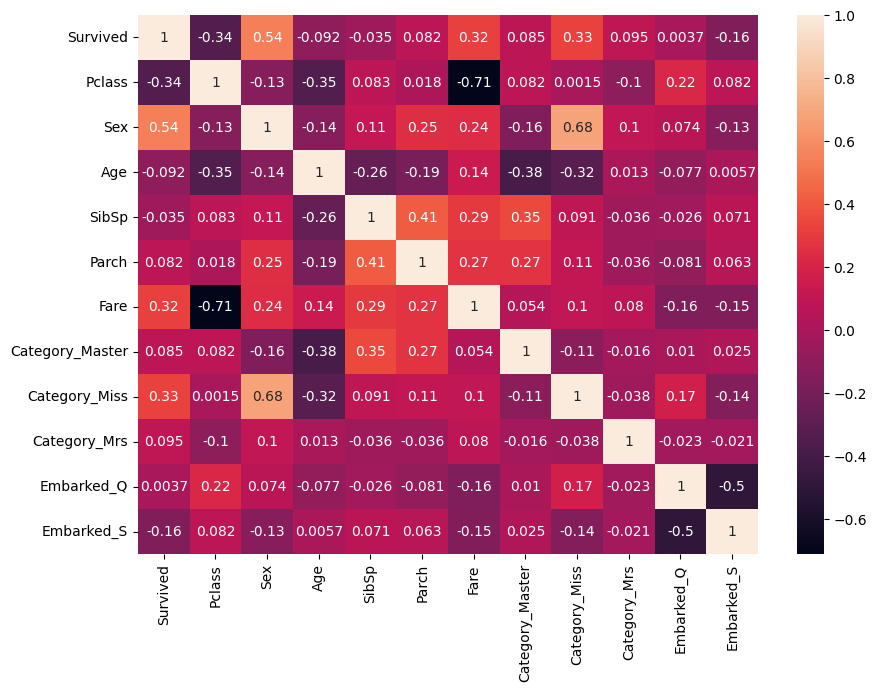

In [46]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot= True)

In [47]:
# Since Fare have a very High Correlation with PClass, it is safe to drop Fare column, as it doesn't benefit our model,
# instead it will leads to multicollinearity and also make our madel heavy.
data.drop('Fare', axis =1 , inplace = True)

In [48]:
# Now we are ready with our cleaned dataset.

In [49]:
X = data.drop(['Survived'], axis =1)
Y = data['Survived']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.25, random_state = 35)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [53]:
X_scaled = scalar.fit_transform(X)

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
# create model
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8026905829596412

In [63]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.804 (0.034)


In [64]:
parameter = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),

}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=500)
rand_search.fit(x_train,y_train)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=2,
                       min_samples_split=4)

In [65]:
print(model.score(x_test,y_test))

0.8295964125560538


In [66]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.822 (0.035)


# XG Boost

In [ ]:
from xgboost import XGBClassifier
# create model
model = XGBClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

In [ ]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
parameter={
            'learning_rate':np.arange(0,1,0.05),
            'max_depth': [1,3,5,6,7,8,9,10,12,15],
            'n_estimators':[10,50,100,200],
            'subsample' : np.arange(0.5,1.1,0.1)
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=7,n_iter=500)
rand_search.fit(x_train,y_train)
model = XGBClassifier(objective = 'binary:logistic', learning_rate = rand_search.best_params_['learning_rate'],max_depth = rand_search.best_params_['max_depth'],n_estimators = rand_search.best_params_['n_estimators'],subsample = rand_search.best_params_['subsample'])
model.fit(x_train,y_train)

In [ ]:
print(model.score(x_test,y_test))

In [ ]:
rand_search.best_params_

In [ ]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Support Vector Classifier (SVC)

In [73]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8340807174887892

In [74]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.827 (0.032)


In [ ]:
parameter={'C':[0.1,1,10,100,500,1000,1250,1500],'gamma':[1,0.1,0.01,0.001],'kernel' :  ['linear', 'rbf']}

from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=100)
rand_search.fit(x_train,y_train)
model = SVC(C = rand_search.best_params_['C'],gamma = rand_search.best_params_['gamma'],kernel = rand_search.best_params_['kernel'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
print(model.score(x_test,y_test))

In [ ]:
rand_search.best_params_

In [ ]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model, X_scaled, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Stacking

In [ ]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [ ]:
#XG Boost
xg = XGBClassifier(subsample= 0.7999999999999999,n_estimators = 100, max_depth = 7, learning_rate = 0.05)

In [ ]:
#random Forest
rf = RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=90)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,min_samples_split=8, splitter='random')

In [ ]:
# Logistic Regression
lg = LogisticRegression()

In [ ]:
# KNN
knn = KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=12, p=1)

In [ ]:
# SVC
svc = SVC()

In [ ]:
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(scaled_data,Y,test_size=0.5, random_state= 355)
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [ ]:
for i in [lg, dt, rf, xg, knn, svc]:
    i.fit(x_train,y_train)
    print(i, ' score: ', i.score(x_test,y_test), '\n')

In [ ]:
predict_val1 = xg.predict(val_train)
predict_val2 = knn.predict(val_train)
predict_val3 = rf.predict(val_train)
predict_val4 = svc.predict(val_train)
predict_val5 = lg.predict(val_train)
predict_val6 = dt.predict(val_train)
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4,predict_val5,predict_val6))
predict_val

In [ ]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test)

In [ ]:
predict_test1 = xg.predict(x_test)
predict_test2 = knn.predict(x_test)
predict_test3 = rf.predict(x_test)
predict_test4 = svc.predict(x_test)
predict_test5 = lg.predict(x_test)
predict_test6 = dt.predict(x_test)
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4,predict_test5,predict_test6))
predict_test

In [ ]:
rand_clf.score(predict_test,y_test)

In [ ]:
parameter = {
    "n_estimators" : np.arange(50,150,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=2000)
rand_search.fit(x_train,y_train)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(predict_val,val_test)

In [ ]:
model.score(predict_test,y_test)

In [ ]:
# evaluate a model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(model,predict_val,val_test, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Conclusion

#### The Machine Learning model gives the `accuracy` `(standard deviation)` as follows:
***
     Naive Bayes                      : 0.624 (0.035)
     XG Boost                         : 0.824 (0.037)
     KNN                              : 0.817 (0.032)
     Stacking                         : 0.821 (0.037)    
     Decision Tree                    : 0.808 (0.032)
     Logistic Regression              : 0.828 (0.041)
     Random Forest                    : 0.820 (0.026)
     Support Vector Classifier (SVC)  : 0.827 (0.032)
     
***
#### So, It would be best to use Random Forest as it has highest accuracy and least variance.